## Update from the meeting on 09/17/2018 by Adewale Obadimu (Toxicity)

#### CODE


 Read the data

In [36]:
import matplotlib.pyplot as plt

import json

with open('data.json') as f:
     data_unsorted = json.load(f)

data = sorted(data_unsorted, key=lambda k: k['published_date'])


Calculate average distance 

In [37]:
def calc_avg_dist(bin_list):
    dists = [x - bin_list[i - 1] for i, x in enumerate(bin_list)][1:]
    avg_dist = round( ( sum(dists) / len(dists) ) , 2)
    return avg_dist
print("Testing the average distance:", calc_avg_dist([14, 20, 50])) 


Testing the average distance: 18.0


Bin the video into ten categories 

In [38]:
bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10 = (
    [] for i in range(10))


Assign members to bins based on their toxicity score

In [39]:
for count, x in enumerate(data):
    if round(x['comment_toxicity'], 1) <= 0.1:
        bin1.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.2:
        bin2.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.3:
        bin3.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.4:
        bin4.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.5:
        bin5.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.6:
        bin6.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.7:
        bin7.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.8:
        bin8.append(count)
    elif round(x['comment_toxicity'], 1) <= 0.9:
        bin9.append(count)
    else:
        bin10.append(count)

# print out the bins here like : 
print("The total number of comments in this video is ", count)

The total number of comments in this video is  80


Display the content of each bins

In [40]:
print()
print("Elements in the first bins are: ")
print(bin1)

print()
print("Elements in the second bins are: ")
print(bin2)
print()
print("Elements in the third bins are: ")
print(bin3)
print()
print("Elements in the fourth bins are: ")
print(bin4)
print()
print("Elements in the fifth bins are: ")
print(bin5)
print()
print("Elements in the sixth bins are: ")
print(bin6)
print()
print()
print("Elements in the seventh bins are: ")
print(bin7)
print()
print("Elements in the eight bins are: ")
print(bin8)
print()
print("Elements in the ninth bins are: ")
print(bin9)
print()
print("Elements in the tenth bins are: ")
print(bin10)
print()


Elements in the first bins are: 
[1, 3, 4, 6, 7, 8, 10, 19, 32, 34, 42, 51, 52, 57, 63, 65, 66, 69, 70, 71, 72, 79, 80]

Elements in the second bins are: 
[13, 30, 45, 47, 55, 56, 61, 62]

Elements in the third bins are: 
[12, 16, 21, 33, 43]

Elements in the fourth bins are: 
[24, 25, 27, 28, 38, 39, 41, 46, 54, 59, 60, 74]

Elements in the fifth bins are: 
[35, 49, 67, 75]

Elements in the sixth bins are: 
[5, 15, 18, 26, 31, 37, 48, 76]


Elements in the seventh bins are: 
[14, 20, 50]

Elements in the eight bins are: 
[0, 2, 11, 22, 29, 40, 44]

Elements in the ninth bins are: 
[68, 73, 78]

Elements in the tenth bins are: 
[9, 17, 23, 36, 53, 58, 64, 77]



Calculate average distances for each bins

In [41]:
print('Calculating average distances for each bin...')
distances = {
    'bin1'  : calc_avg_dist(bin1),
    'bin2'  : calc_avg_dist(bin2),
    'bin3'  : calc_avg_dist(bin3),
    'bin4'  : calc_avg_dist(bin4),
    'bin5'  : calc_avg_dist(bin5),
    'bin6'  : calc_avg_dist(bin6),
    'bin7'  : calc_avg_dist(bin7),
    'bin8'  : calc_avg_dist(bin8),
    'bin9'  : calc_avg_dist(bin9),
    'bin10' : calc_avg_dist(bin10)
}

print(distances)

Calculating average distances for each bin...
{'bin1': 3.59, 'bin2': 7.0, 'bin3': 7.75, 'bin4': 4.55, 'bin5': 13.33, 'bin6': 10.14, 'bin7': 18.0, 'bin8': 7.33, 'bin9': 5.0, 'bin10': 9.71}


In [42]:
distance = [calc_avg_dist(bin1), calc_avg_dist(bin2), calc_avg_dist(bin3), calc_avg_dist(bin3), calc_avg_dist(bin4), calc_avg_dist(bin5), calc_avg_dist(bin6), calc_avg_dist(bin8), calc_avg_dist(bin9), calc_avg_dist(bin10)]

In [43]:
len1 = print(len(bin1))
bin2 =  print(len(bin2))
bin3 =  print(len(bin3))
bin4 =  print(len(bin4))
bin5 =  print(len(bin5))
bin6 =  print(len(bin6))
bin7 =  print(len(bin7))
bin8 =  print(len(bin8))
bin9 =  print(len(bin9))
bin10 =  print(len(bin10))


23
8
5
12
4
8
3
7
3
8


# RESULT

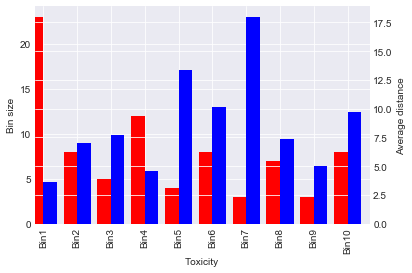

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
s = StringIO("""Toxicity     BinSize     AverageDistance
Bin1   23  3.59
Bin2   8   7.0
Bin3   5   7.75
Bin4   12  4.55
Bin5   4   13.33
Bin6   8   10.14
Bin7   3   18.0
Bin8   7   7.33
Bin9   3   5.0
Bin10  8   9.71

""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.BinSize.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.AverageDistance.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Bin size')
ax2.set_ylabel('Average distance')

plt.show()

#### Inference and next steps

The **_average distance_** (also known as the _sliding window_) is defined as the cummulative average between pairs of comments in a temporal order. For instance, if we have comments in the 14th, 20th and 50th positions of a specific bin. Then the sliding window is computed as ((20-14)+(50-20))/2 = **18**. (_2 is the number of pairs_ )

The **_bin size_** is the total number of comments in a specific bin. For instance, considering the example above containing comments at the 14th, 20th and 50th positions, respectively, the bin size will be **3**.


For this video, we can see that the average distance between each elements in Bin1 is low (_i.e., 3.59_), this suggests the presence of high cohesion between low toxic comments. In general, the lower the bin size (bin5,bin6,..,bin10), the higher the average distance, which suggests that toxicity is not contagious for this video (_This is what I think_).

*Since this is a conspiracy video, the low toxic commenters could be trying to debunk some of the toxic claims.*

**Next steps**
Perform similar analysis for the top 30 videos (with highest comments in the dataset).

